In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from collections import defaultdict
%matplotlib inline

In [41]:
def step(act, current):
        
    if act == 0: #UP
        if current in list(range(0,12)):
            state = current
        else:
            state = current - 12
            
    if act == 1: #RIGHT
        if current in [11,23,35]:
            state = current
        else:
            state = current+ 1
    if act == 2: #down
        if current in list(range(36,48)):
            state = current
        else:
            state = current + 12
    if act == 3: #left
        if current in [0,12,24,36]:
            state = current
        else:
            state = current -1
    if state in list(range(37,48)):
        if state == 47:
            reward = -1
            done = True
        else:
            done = False
            state = 36
            reward = -100
    else:
        done = False
        reward = -1
    return state, reward, done

In [42]:
def reset():
    return 36

In [43]:
def eps_greedy(Q,state,epsilon):
    if np.random.random_sample() >= epsilon:
        return np.argmax(Q[state])
    else:
        return np.random.randint(0, 4)

In [44]:
def TD(algo, alpha, episodes, epsilon, gamma ):
    #algo : Q for Q learning
    #S for Sarsa
    
    Q = defaultdict(lambda: np.zeros(4))
    rew_sum = []
    for i in range(episodes):
        rewards = []
        #first step 
        observation = reset()
        for k in range(1000):
            action = eps_greedy(Q, observation, epsilon)
            #print("action:",action)
            next_obs, reward, done= step(action, observation)
            if algo == "Q":
                Q[observation][action] += alpha*(reward + gamma* np.max(Q[next_obs]) - Q[observation][action])
            elif algo == "S":
                new_action = eps_greedy(Q, next_obs, epsilon)
                Q[observation][action] += alpha*(reward + gamma* Q[next_obs][new_action] - Q[observation][action])
            
            observation = next_obs
            rewards.append(reward)
            
            if done == True:
                break
                
        rew_sum.append(np.sum(rewards))
    
    return rew_sum

In [65]:
sum_Q= TD("Q",0.1, 500,0.1, 0.4)
sum_sarsa= TD("S",0.1, 500,0.1, 0.9)

In [66]:
#taken from stackoverflow to smooth the plots
smooth_q = pd.Series(sum_Q).rolling(10, min_periods=10).mean()
smooth_sarsa = pd.Series(sum_sarsa).rolling(10, min_periods=10).mean()

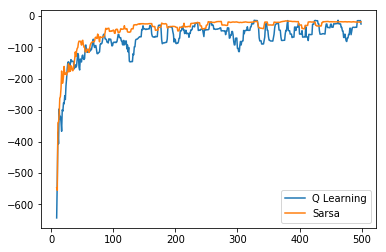

In [67]:
plt.plot(smooth_q, label = "Q Learning")
plt.plot(smooth_sarsa, label = "Sarsa")
plt.legend()